In [3]:
#   Name: Ravindra Neralla
#   Date: 08/08/2020
#  Project Milestone5 - Chicago Crime Data Analysis
import sqlite3
conn = sqlite3.connect('DSC540.db')
c = conn.cursor()


In [2]:
c.execute('''SELECT DISTINCT * FROM chicago_crime ''')
result = c.fetchone();
print(result)

(24368, 'JC103046', '2019-01-03 14:37:00', '050XX S INDIANA AVE', '0110', 'HOMICIDE', 'FIRST DEGREE MURDER', 'AUTO', '0', '0', '224', '2', '3.0', '38', '01A', '2019', '03/19/2019 04:11:22 PM')


In [3]:
c.execute('''SELECT  * FROM us_holidays ''')
result = c.fetchall();
print(result)

[('2019-01-01 00:00:00', 'New Year’s Day'), ('2019-01-21 00:00:00', 'Birthday of Martin Luther King, Jr.'), ('2019-02-18 00:00:00', 'Washington’s Birthday'), ('2019-05-27 00:00:00', 'Memorial Day'), ('2019-07-04 00:00:00', 'Independence Day'), ('2019-09-02 00:00:00', 'Labor Day'), ('2019-10-14 00:00:00', 'Columbus Day'), ('2019-11-11 00:00:00', 'Veterans Day'), ('2019-11-28 00:00:00', 'Thanksgiving Day'), ('2019-12-25 00:00:00', 'Christmas Day')]


In [4]:
c.execute('''SELECT  * FROM chicago_weather''')
result = c.fetchone();
print(result)

('Chicago,IL,USA', '01/01/2019', 27.7, 35.8, 17.1, 20.8, 16.4)


Most Crimes happend in 2019 on a single day

In [6]:
c.execute('''SELECT date(Date),count(*) FROM chicago_crime group by date(Date) order by count(*) desc ''')
result = c.fetchone();
print(result)

('2019-01-01', 1014)


Least Crime incidents happend in 2019 on a single day

In [7]:
c.execute('''SELECT date(Date),count(*) FROM chicago_crime group by date(Date) order by count(*) asc ''')
result = c.fetchone();
print(result)

('2019-01-30', 341)


Average Crimes Per Day

In [58]:
c.execute('''SELECT count(*)/365 FROM chicago_crime''')
result = c.fetchone();
print(result)

(710,)


Crime Incidents by Crime Type

In [60]:
sql = '''select count(*),Primary_Type from chicago_crime cri group by Primary_Type order by count(*) desc'''
c.execute(sql)
result=c.fetchall();
print(result)

[(62387, 'THEFT'), (49486, 'BATTERY'), (26671, 'CRIMINAL DAMAGE'), (20607, 'ASSAULT'), (18319, 'DECEPTIVE PRACTICE'), (16695, 'OTHER OFFENSE'), (14220, 'NARCOTICS'), (9627, 'BURGLARY'), (8979, 'MOTOR VEHICLE THEFT'), (7989, 'ROBBERY'), (6817, 'CRIMINAL TRESPASS'), (6325, 'WEAPONS VIOLATION'), (2291, 'OFFENSE INVOLVING CHILDREN'), (1546, 'INTERFERENCE WITH PUBLIC OFFICER'), (1520, 'PUBLIC PEACE VIOLATION'), (1295, 'SEX OFFENSE'), (1248, 'CRIM SEXUAL ASSAULT'), (680, 'PROSTITUTION'), (503, 'HOMICIDE'), (378, 'ARSON'), (351, 'CRIMINAL SEXUAL ASSAULT'), (231, 'LIQUOR LAW VIOLATION'), (223, 'STALKING'), (217, 'CONCEALED CARRY LICENSE VIOLATION'), (172, 'KIDNAPPING'), (163, 'INTIMIDATION'), (142, 'GAMBLING'), (58, 'OBSCENITY'), (11, 'HUMAN TRAFFICKING'), (11, 'PUBLIC INDECENCY'), (8, 'OTHER NARCOTIC VIOLATION'), (4, 'NON-CRIMINAL')]


Most occuring Crime Incidents

In [61]:
sql = '''select count(*),Primary_Type from chicago_crime cri group by Primary_Type
         having count(*) > 10000 order by count(*) desc'''
c.execute(sql)
result=c.fetchall();
print(result)

[(62387, 'THEFT'), (49486, 'BATTERY'), (26671, 'CRIMINAL DAMAGE'), (20607, 'ASSAULT'), (18319, 'DECEPTIVE PRACTICE'), (16695, 'OTHER OFFENSE'), (14220, 'NARCOTICS')]


Average Number of Crime Incidents in Day by type of crime

In [62]:
sql = '''select count(*)/365,Primary_Type from chicago_crime cri group by Primary_Type
         having count(*) > 10000 order by count(*) desc'''
c.execute(sql)
result=c.fetchall();
print(result)

[(170, 'THEFT'), (135, 'BATTERY'), (73, 'CRIMINAL DAMAGE'), (56, 'ASSAULT'), (50, 'DECEPTIVE PRACTICE'), (45, 'OTHER OFFENSE'), (38, 'NARCOTICS')]


Crime Incident Monthly Summary 

In [65]:
sql = '''select strftime('%Y-%m',date),count(*) FROM chicago_crime cri group by strftime('%Y-%m',cri.date) order by count(*) desc'''
c.execute(sql)
result=c.fetchall();
print(result)

[('2019-07', 24710), ('2019-08', 24151), ('2019-05', 23555), ('2019-06', 23466), ('2019-09', 22249), ('2019-10', 21492), ('2019-04', 20949), ('2019-12', 20545), ('2019-03', 20371), ('2019-11', 19738), ('2019-01', 19596), ('2019-02', 18352)]


Crime Incident Daily Summary 

In [66]:
sql = '''select strftime('%Y-%m-%d',date),count(*) FROM chicago_crime cri inner join chicago_weather cw  
         on strftime('%Y-%m-%d',substr([Date time],7,4)||'-'||substr([Date time],1,2)||'-'||substr([Date time],4,2))= 
         strftime('%Y-%m-%d',cri.date) 
         group by strftime('%Y-%m-%d',cri.date) 
         order by count(*)'''
c.execute(sql)
result=c.fetchall();
print(result)

[('2019-01-30', 341), ('2019-01-31', 458), ('2019-01-29', 492), ('2019-11-11', 492), ('2019-01-20', 493), ('2019-11-28', 500), ('2019-12-25', 510), ('2019-01-19', 520), ('2019-01-28', 521), ('2019-01-27', 522), ('2019-01-26', 530), ('2019-12-31', 535), ('2019-04-14', 536), ('2019-03-05', 539), ('2019-11-12', 541), ('2019-03-04', 543), ('2019-02-24', 546), ('2019-03-03', 551), ('2019-01-21', 555), ('2019-10-26', 557), ('2019-10-30', 570), ('2019-01-13', 572), ('2019-11-13', 573), ('2019-11-14', 573), ('2019-10-31', 582), ('2019-01-25', 584), ('2019-02-18', 589), ('2019-02-03', 592), ('2019-02-28', 593), ('2019-02-25', 595), ('2019-12-11', 596), ('2019-12-26', 598), ('2019-01-24', 605), ('2019-04-28', 605), ('2019-02-26', 606), ('2019-03-07', 606), ('2019-02-19', 607), ('2019-12-24', 608), ('2019-03-17', 610), ('2019-03-10', 611), ('2019-12-30', 614), ('2019-03-09', 616), ('2019-02-17', 617), ('2019-12-16', 622), ('2019-01-22', 623), ('2019-02-11', 623), ('2019-10-29', 624), ('2019-03-12

In [35]:
import pandas as pd
sql = '''select strftime('%Y-%m-%d',date),[Maximum Temperature],count(*) as number_of_crimes FROM chicago_crime cri inner join chicago_weather cw  
         on strftime('%Y-%m-%d',substr([Date time],7,4)||'-'||substr([Date time],1,2)||'-'||substr([Date time],4,2))= 
         strftime('%Y-%m-%d',cri.date) 
         group by strftime('%Y-%m-%d',cri.date),[Maximum Temperature]
         order by [Maximum Temperature] desc'''
c.execute(sql)
#result=c.fetchall();
#print(result)
df = pd.DataFrame(c.fetchall(),columns=['date','temp','number_of_crimes'])
print(df)

           date  temp  number_of_crimes
0    2019-07-10  93.4               834
1    2019-07-19  92.1               793
2    2019-07-20  92.1               820
3    2019-07-02  91.1               767
4    2019-07-15  89.3               820
5    2019-09-10  88.9               714
6    2019-08-05  88.8               805
7    2019-09-11  88.3               740
8    2019-07-05  88.1               889
9    2019-07-13  88.1               888
10   2019-07-28  88.1               826
11   2019-07-04  87.9               800
12   2019-07-27  87.1               822
13   2019-07-18  86.4               754
14   2019-09-30  86.1               750
15   2019-10-01  86.1               853
16   2019-08-07  85.1               753
17   2019-06-25  84.3               776
18   2019-08-29  83.8               768
19   2019-07-12  83.2               781
20   2019-08-16  83.2               764
21   2019-08-21  82.7               711
22   2019-07-26  82.4               808
23   2019-08-11  82.1               802


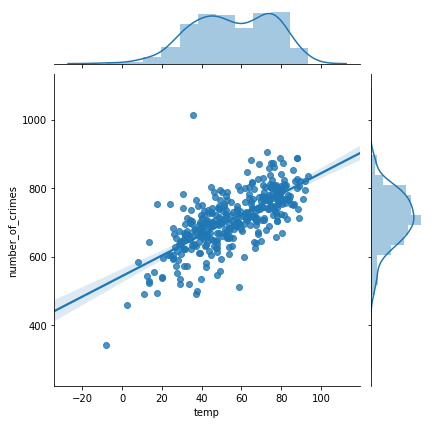

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="darkgrid")
#print(sns.__version__)
#sns.pairplot(x="temp", y="number_of_crimes", data=df);
sns.jointplot(x="temp", y="number_of_crimes",kind='reg', data=df);


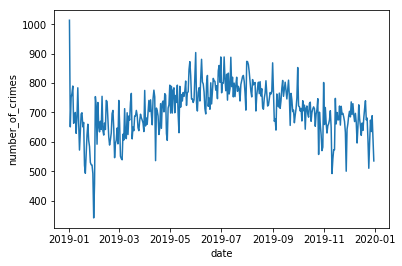

In [9]:
#print(sns.__version__)
#df['date'] = df['date'].astype(str)
from seaborn import lineplot
df['date']= pd.to_datetime(df['date'].str.strip(), format='%Y-%m-%d')
#df['date'] = pd.to_datetime(df['date'], format='yyyy-mm-dd')
sns.lineplot(x="date", y="number_of_crimes", data=df);
#print(df.date)

In [ ]:
import seaborn as sns
planets = sns.load_dataset("planets")
g = sns.factorplot("year", data=planets, aspect=1.5, kind="count", color="b")
g.set_xticklabels(rotation=30)

Crime Incidents on Holidays

In [40]:
sql = '''select date(cri.date),count(*),holiday from chicago_crime cri join us_holidays hol on date(cri.Date)=date(hol.Date) group by date(cri.date),holiday order by count(*) desc'''
c.execute(sql)
df = pd.DataFrame(c.fetchall(),columns=['date','number_of_crimes','holiday'])
df['holiday']= df['holiday'].astype(str)
#result=c.fetchall();
print(df)

         date  number_of_crimes                              holiday
0  2019-01-01              1014                       New Year’s Day
1  2019-07-04               800                     Independence Day
2  2019-09-02               774                            Labor Day
3  2019-05-27               746                         Memorial Day
4  2019-10-14               684                         Columbus Day
5  2019-02-18               589                Washington’s Birthday
6  2019-01-21               555  Birthday of Martin Luther King, Jr.
7  2019-12-25               510                        Christmas Day
8  2019-11-28               500                     Thanksgiving Day
9  2019-11-11               492                         Veterans Day


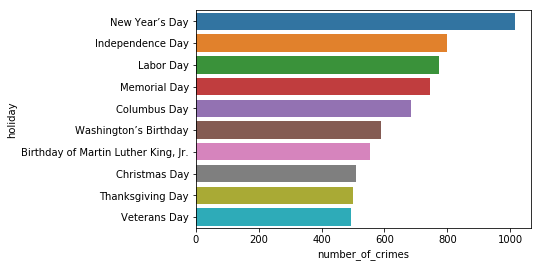

In [45]:
sns.barplot(y="holiday", x="number_of_crimes", data=df)

Type of crime during holidays

In [57]:
sql = '''select date(cri.date),count(*),holiday,Primary_Type from chicago_crime cri join us_holidays hol on date(cri.Date)=date(hol.Date) group by date(cri.date),holiday,Primary_Type order by count(*) desc '''
c.execute(sql)
result=c.fetchall();
print(result)

[('2019-01-01', 213, 'New Year’s Day', 'BATTERY'), ('2019-07-04', 212, 'Independence Day', 'BATTERY'), ('2019-09-02', 190, 'Labor Day', 'THEFT'), ('2019-10-14', 174, 'Columbus Day', 'THEFT'), ('2019-05-27', 168, 'Memorial Day', 'THEFT'), ('2019-09-02', 166, 'Labor Day', 'BATTERY'), ('2019-05-27', 158, 'Memorial Day', 'BATTERY'), ('2019-02-18', 153, 'Washington’s Birthday', 'THEFT'), ('2019-01-01', 152, 'New Year’s Day', 'THEFT'), ('2019-12-25', 149, 'Christmas Day', 'BATTERY'), ('2019-07-04', 140, 'Independence Day', 'THEFT'), ('2019-01-21', 136, 'Birthday of Martin Luther King, Jr.', 'THEFT'), ('2019-11-28', 126, 'Thanksgiving Day', 'BATTERY'), ('2019-01-01', 124, 'New Year’s Day', 'CRIMINAL DAMAGE'), ('2019-01-01', 118, 'New Year’s Day', 'DECEPTIVE PRACTICE'), ('2019-11-11', 112, 'Veterans Day', 'THEFT'), ('2019-02-18', 110, 'Washington’s Birthday', 'BATTERY'), ('2019-10-14', 109, 'Columbus Day', 'BATTERY'), ('2019-07-04', 99, 'Independence Day', 'CRIMINAL DAMAGE'), ('2019-11-28', 97

Temperature vs Street Crimes Analysis

In [53]:
sql = '''select [Maximum Temperature],count(*) as street_crimes FROM chicago_crime cri inner join chicago_weather cw  
         on strftime('%Y-%m-%d',substr([Date time],7,4)||'-'||substr([Date time],1,2)||'-'||substr([Date time],4,2))= 
         strftime('%Y-%m-%d',cri.date) 
         where Location_Desc='STREET'
         group by [Maximum Temperature]
         order by [Maximum Temperature] desc'''
c.execute(sql)
df = pd.DataFrame(c.fetchall(),columns=['Temperature','street_crimes'])
#df['holiday']= df['holiday'].astype(str)
#result=c.fetchall();
df.head()

,Temperature,street_crimes
0,93.4,188
1,92.1,390
2,91.1,163
3,89.3,172
4,88.9,138


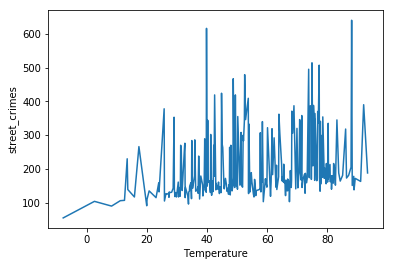

In [54]:
sns.lineplot(x="Temperature", y="street_crimes", data=df);

In [61]:
sql = '''select [Maximum Temperature] FROM chicago_crime cri inner join chicago_weather cw  
         on strftime('%Y-%m-%d',substr([Date time],7,4)||'-'||substr([Date time],1,2)||'-'||substr([Date time],4,2))= 
         strftime('%Y-%m-%d',cri.date) 
         where Location_Desc='GAS STATION'
         '''
c.execute(sql)
df = pd.DataFrame(c.fetchall(),columns=['Temperature'])
df['Temperature']= df['Temperature'].astype(int)
#result=c.fetchall();
df.dtypes

Temperature    int32
dtype: object

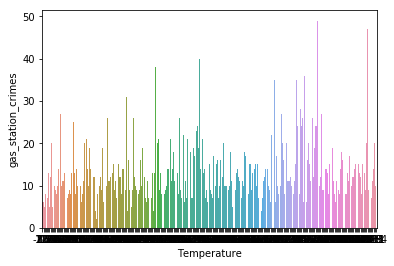

In [57]:
sns.barplot(x="Temperature", y="gas_station_crimes", data=df);
#sns.barplot(y="holiday", x="number_of_crimes", data=df)